In [1]:
import numpy as np
# Plotting
import pandas as pd
from helpers_pd import *
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sns
sns.set()
# plt.style.use('seaborn-white')
import matplotlib.pyplot as plt

In [2]:
df = get_data(gen="Gen1")
df['k_d'] = df.loc[:, 'k_oc'] * df.loc[:,'f_oc']

In [3]:
# list(df)
# df.index
# 'LHS_s2var8/1/' in df.index

In [4]:
# For later, 'KGE-d13C_out', 'NSE-d13C_out'
dfs = df[['Model', 
          'z3_factor',
          'cZ0Z1',
          'cZ',
          'c_adr',
          'k_g',
          'gamma01',
          'gammaZ',
          'f_transp',
          'k_d',
#           'f_oc',
          'k_oc',
          'beta_runoff',
          'dt_50_aged',
          'dt_50_ab',
          'dt_50_ref',
          'epsilon_iso',
          'beta_moisture',
          'KGE-CONC-tra', 'KGE-d13C-tra',
          'KGE-Q_out', 'KGE-CONC_out', 'KGE-d13C_out',
          'MAE-CONC_out', 
          'NSE-CONC_out', 'NSE-Q_out',
          'BIAS-CONC_out',
          'BIAS-LDS_out',
          'BIAS-Q_out'
          ]]

In [5]:
print(dfs['KGE-CONC_out'].max(), dfs['NSE-CONC_out'].max())
# dfs['NSE-Q_out'].max()
# dfs['KGE-Q_out' ].max()
# dfs['BIAS-CONC_out'].min()
# dfs['BIAS-LDS_out'].min()

(0.36008130938978367, 0.026332929158524587)


In [42]:
# ff_out = dfs.loc[(dfs['KGE-Q_out'] > 0.6)] # & (dfs['KGE-LDS_out'] > 0) ]
# ff_out = dfs.loc[(dfs['NSE-Q_out'] > 0.4)] # & (dfs['KGE-LDS_out'] > 0) ]

# ff_out = dfs.loc[(dfs['KGE-CONC_out'] > 0.2)] # & (dfs['KGE-LDS_out'] > 0) ]
ff_out = dfs.loc[(dfs['KGE-d13C_out'] > 0.0) & (dfs['KGE-CONC_out'] > 0.2)] # & (dfs['KGE-LDS_out'] > 0) ]
# ff_out = dfs.loc[(dfs['NSE-Q_out'] > 0.54)] # & (dfs['KGE-LDS_out'] > 0) ]
# ff_out = dfs
print(len(ff_out))

360


In [36]:
ff_out.head()

,Model,z3_factor,cZ0Z1,cZ,c_adr,k_g,gamma01,gammaZ,f_transp,k_d,...,KGE-d13C-tra,KGE-Q_out,KGE-CONC_out,KGE-d13C_out,MAE-CONC_out,NSE-CONC_out,NSE-Q_out,BIAS-CONC_out,BIAS-LDS_out,BIAS-Q_out
LHS_be1fix7/76/,fix,0.865109,0.895801,0.742887,0.210237,1643.107366,0.540420,0.073199,0.336878,90.171227,...,0.879977,0.058080,0.305819,0.605293,2.415169,-0.601409,0.005148,-13.668982,320.768979,89.597571
LHS_be1var1/115/,var,0.785039,0.290537,0.047910,0.973624,1200.342928,0.264750,0.517012,0.580366,88.733452,...,0.820726,-0.345454,0.305469,0.510541,2.340700,-0.405533,-0.526737,-21.978215,346.962626,131.298746
LHS_be1var6/176/,var,0.881072,0.864938,0.369887,0.553537,2795.354231,0.571866,0.045882,0.685795,167.772856,...,0.811687,0.739553,0.306462,0.526787,2.345757,-0.353109,0.527713,-23.075718,179.116506,10.454619
LHS_be1var6/272/,var,0.896833,0.891155,0.829368,0.172778,2781.042819,0.695915,0.081772,0.715385,112.781289,...,0.747676,0.657017,0.265390,0.555081,2.227810,-0.231018,0.484206,-31.354410,126.218752,-8.808073
LHS_be1var6/295/,var,0.972696,0.731694,0.641088,0.224143,1837.917894,0.736838,0.147278,0.436493,48.646481,...,0.676075,0.743382,0.303944,0.513947,2.569219,-0.694521,0.514800,-3.966852,245.861999,7.859703


In [37]:
ff_out['IsoOut'] = ff_out.apply(IsoKGEout, args=(0.2,), axis=1)
ff_out['ConcSoil'] = ff_out.apply(ConcKGEsoil, args=(0.4,), axis=1)

In [38]:
dm_simp = pd.melt(ff_out, 
                 id_vars=['KGE-Q_out', 'KGE-CONC_out',  'KGE-d13C_out','Model', 'IsoOut', 'ConcSoil'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
#                          'f_oc',
                         'k_d',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

In [39]:
dm_simp.head()

,KGE-Q_out,KGE-CONC_out,KGE-d13C_out,Model,IsoOut,ConcSoil,variable,value
0,0.058080,0.305819,0.605293,fix,KGE-d13C > 0.2,KGE-SM-tra < 0.4,z3_factor,0.865109
1,-0.345454,0.305469,0.510541,var,KGE-d13C > 0.2,KGE-SM-tra < 0.4,z3_factor,0.785039
2,0.739553,0.306462,0.526787,var,KGE-d13C > 0.2,KGE-SM-tra < 0.4,z3_factor,0.881072
3,0.657017,0.265390,0.555081,var,KGE-d13C > 0.2,KGE-SM-tra < 0.4,z3_factor,0.896833
4,0.743382,0.303944,0.513947,var,KGE-d13C > 0.2,KGE-SM-tra < 0.4,z3_factor,0.972696


## Outlet, fix vs. var

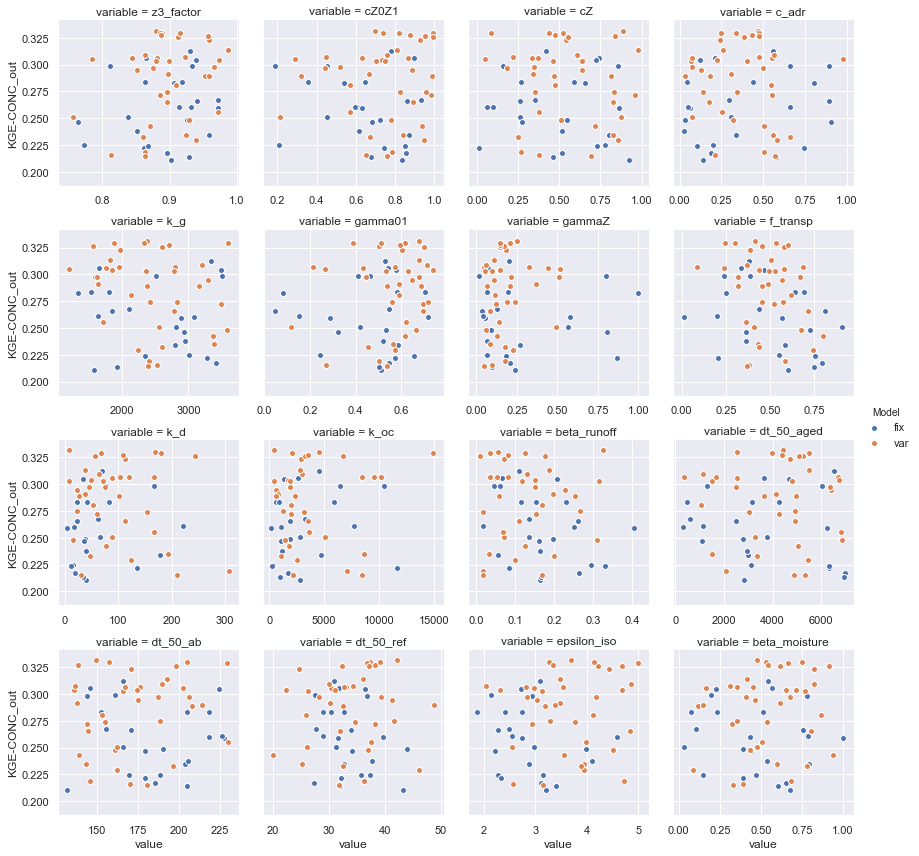

In [40]:
g = sns.FacetGrid(dm_simp, col="variable", hue="Model", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC_out', edgecolor="w").add_legend()

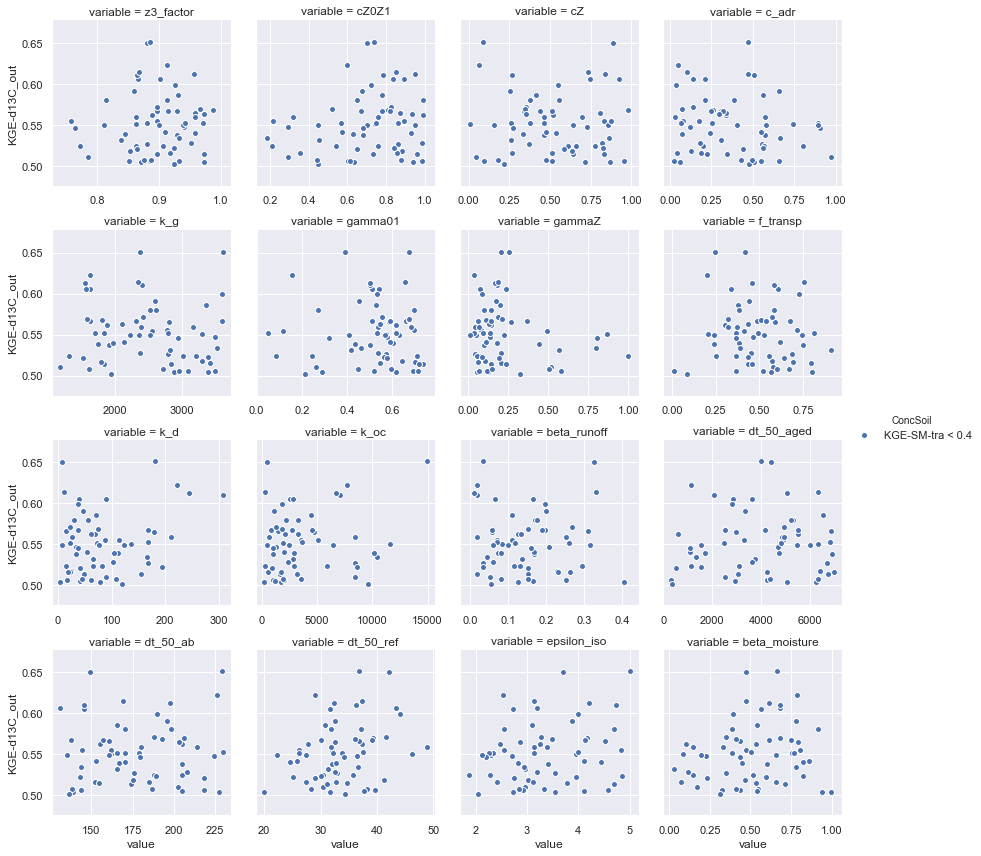

In [41]:
g = sns.FacetGrid(dm_simp, col="variable", hue="ConcSoil", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-d13C_out', edgecolor="w").add_legend()

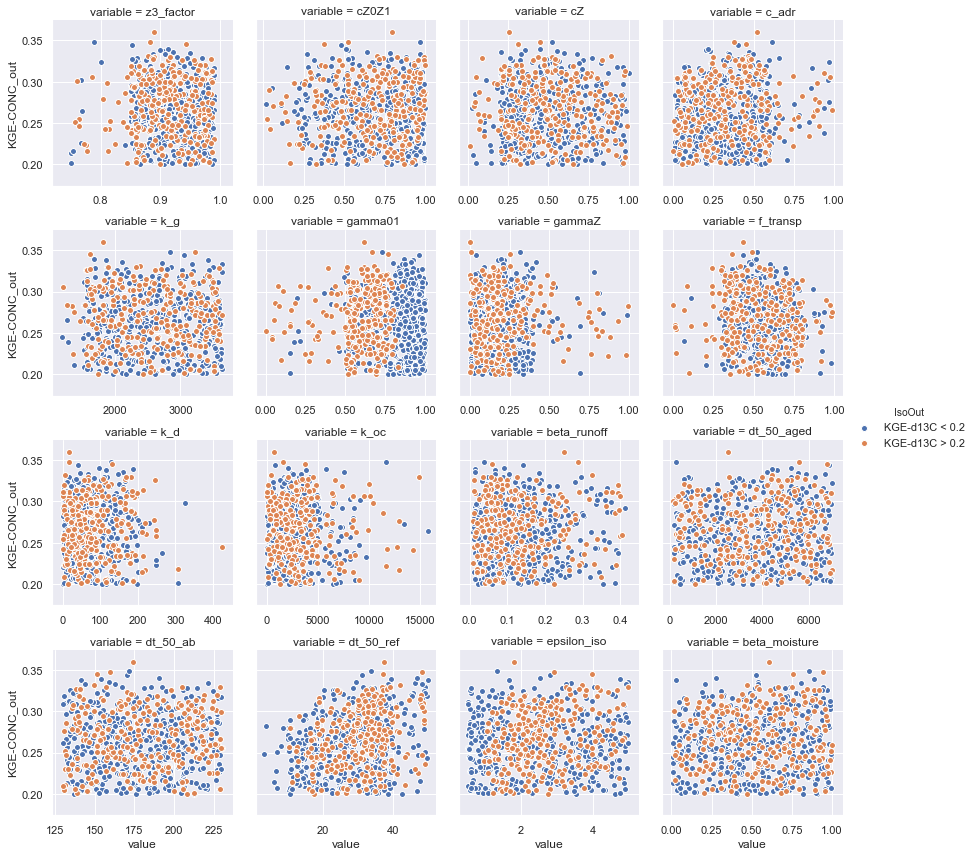

In [13]:
g = sns.FacetGrid(dm_simp, col="variable", hue="IsoOut", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC_out', edgecolor="w").add_legend()

### Based on the above constraint, select samples that also meet a soil constraint for delta!

In [14]:
ff_out['ModIsoSoil'] = ff_out.apply(ModelIsoKGEsoil, args=(0.8,), axis=1)

In [15]:
dm = pd.melt(ff_out, 
                 id_vars=['KGE-Q_out', 'KGE-CONC_out', 'Model', 'ModIsoSoil'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'k_d',
#                          'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

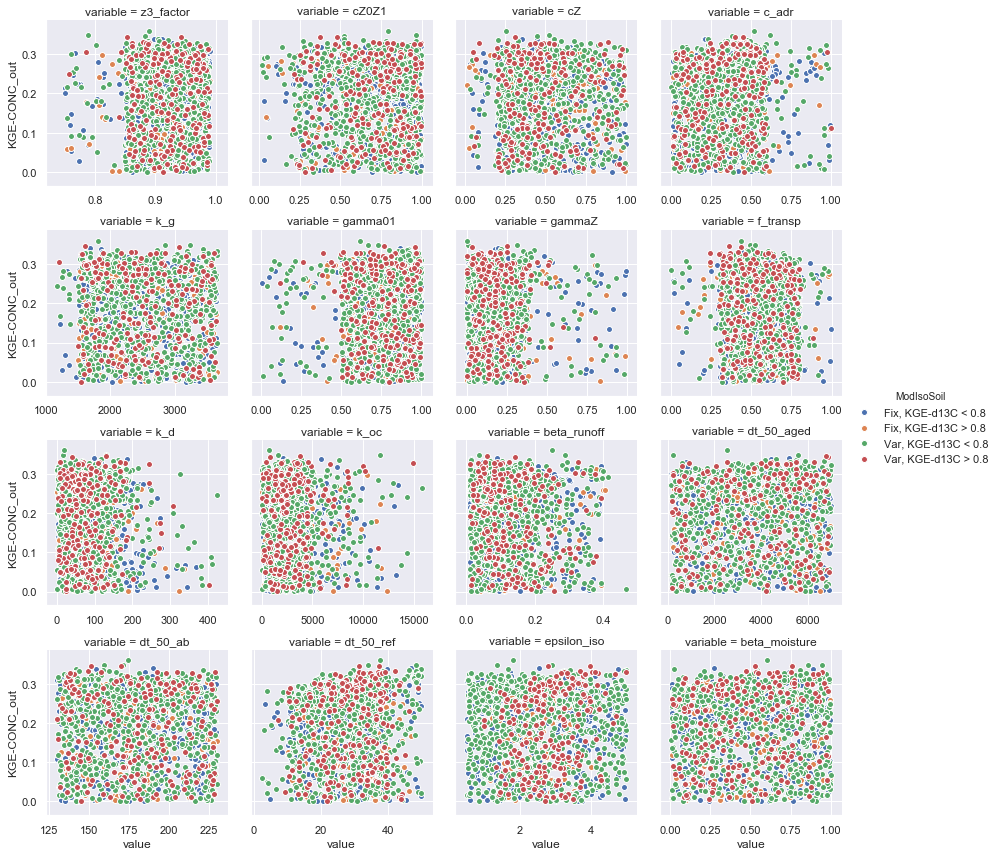

In [16]:
g = sns.FacetGrid(dm, col="variable", hue="ModIsoSoil", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC_out', edgecolor="w").add_legend()

We find that the uncertainty with very 'low-end' DT50 values is completely gone. Now the best performance model (i.e., var) provides a range from 26 to 33 DT50!!!

Epsilon values are now between -2.75 and -3.00!!

### No increase constraints even more at the outlet, by checking for isotopic signatures there.

In [17]:
ff_out = dfs.loc[(dfs['KGE-CONC_out'] > 0) & (dfs['KGE-d13C_out'] > 0.5) ]
len(ff_out)

116

In [18]:
# Apply soil transect constraints
ff_out['ModIsoCstr'] = ff_out.apply(ModelIsoKGEsoil, args=(0.8,), axis=1) 

dm = pd.melt(ff_out, 
                 id_vars=['KGE-Q_out', 'KGE-CONC_out', 'Model', 'ModIsoCstr'],
             value_vars=['z3_factor',
                         'cZ0Z1',
                         'cZ',
                         'c_adr',
                         'k_g',
                         'gamma01',
                         'gammaZ',
                         'f_transp',
                         'k_d',
#                          'f_oc',
                         'k_oc',
                         'beta_runoff',
                         'dt_50_aged',
                         'dt_50_ab',
                         'dt_50_ref',
                         'epsilon_iso',
                         'beta_moisture'])

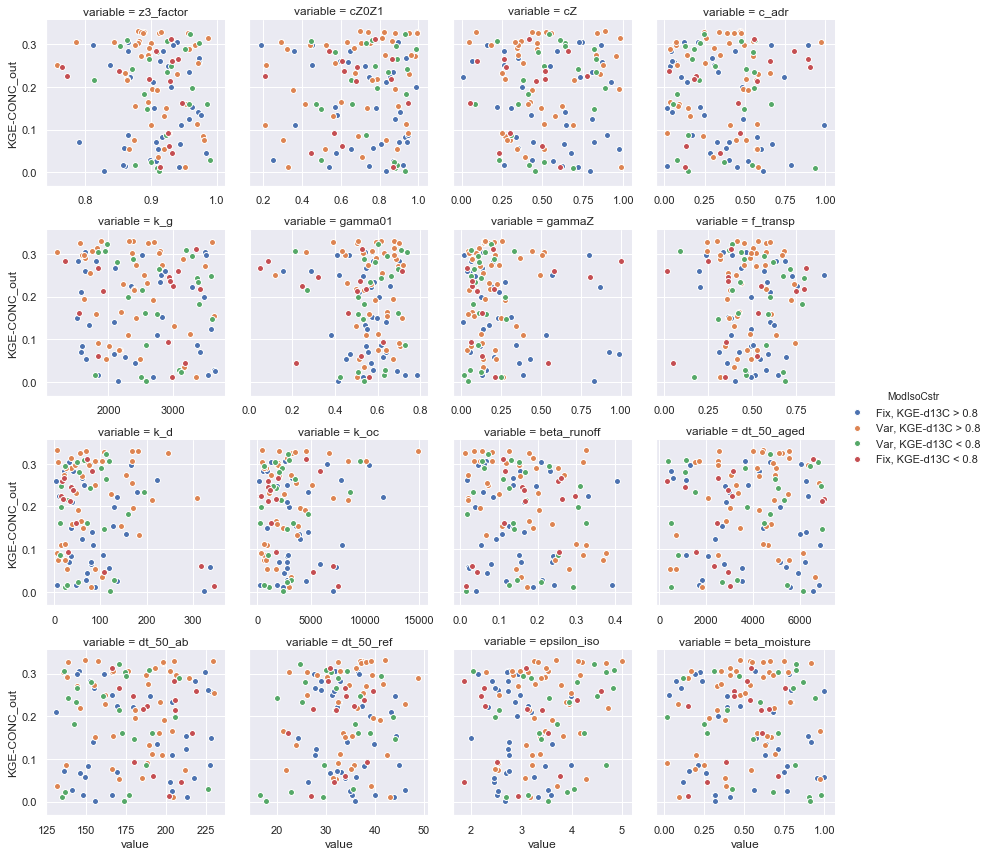

In [19]:
g = sns.FacetGrid(dm, col="variable", hue="ModIsoCstr", col_wrap=4, sharex=False)
g = g.map(plt.scatter, "value", 'KGE-CONC_out', edgecolor="w").add_legend()

## Notice the axes for DT50!

In [20]:
koc = 5000.0
np.log(koc)

8.517193191416238

In [5]:
2643+1347

3990

In [6]:
7000 - 2400

4600